In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
import numpy as np
from sklearn.metrics import f1_score
import pickle
from sklearn.metrics import accuracy_score

# Этап 1. Подготовка данных на обучение

In [2]:
X = pd.read_csv("D:/datasets/pfo/x.csv", sep=",", encoding='Windows-1251')

In [3]:
y = pd.read_csv("D:/datasets/pfo/y.csv", sep=",", encoding='Windows-1251')

In [4]:
X = X.drop("Unnamed: 0", axis=1)

In [5]:
y = y.drop("Unnamed: 0", axis=1)

In [6]:
X

,gndr,prsnt_age,cprtn_prd_d,accnt_status,pnsn_age,prvs_npf,rgn,assgn_npo,assgn_ops
0,0.0,0.387097,0.175257,1.0,0.0,0.0,0.445545,0.0,0.0
1,0.0,0.225806,5.020875,0.0,0.5,0.0,0.990099,0.0,0.0
2,1.0,0.322581,6.896488,0.0,1.0,1.0,0.039604,0.0,0.0
3,1.0,0.322581,7.367972,0.0,1.0,1.0,0.356436,0.0,0.0
4,0.0,0.451613,0.087499,1.0,0.0,1.0,0.603960,0.0,0.0
...,...,...,...,...,...,...,...,...,...
39876,0.0,0.483871,-0.003701,1.0,0.0,1.0,0.613861,0.0,0.0
39877,0.0,0.483871,-0.383986,1.0,0.0,1.0,0.029703,0.0,0.0
39878,0.0,0.322581,5.795211,0.0,0.4,1.0,0.653465,0.0,0.0
39879,1.0,0.306452,9.276279,0.0,1.0,1.0,0.722772,0.0,0.0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Проверка LightGBM

In [8]:
lgbm_model = LGBMClassifier()

In [9]:
params = {
    'n_estimators': [50, 100, 120, 170],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'num_leaves': [50, 100, 200, 400]
}
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=params, cv=3, n_jobs=-1, scoring='accuracy')

In [10]:
grid_search.fit(X, y)

C:\Users\nanan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nanan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 19370, number of negative: 20511
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001255 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 39881, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485695 -> initscore=-0.057236
[LightGBM] [Info] Start training from score -0.057236
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01],
                         'n_estimators': [50, 100, 120, 170],
                         'num_leaves': [50, 100, 200, 400]},
             scoring='accuracy')

In [11]:
best_estimator = grid_search.best_estimator_

In [12]:
f1_score(y_test, best_estimator.predict(X_test))

0.9997639839509087

In [14]:
best_estimator.score(X_test, y_test)

0.9997720537953043

Проверка XGBoost

In [15]:
import xgboost as xgb

In [16]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

C:\Users\nanan\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [17]:
f1_score(y_test, xgb_model.predict(X_test))

1.0

In [18]:
xgb_model.score(X_test, y_test)

1.0

Проверка RandomForest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=40, max_depth=5)
rf_model.fit(X, y)

C:\Users\nanan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, n_estimators=40)

In [20]:
f1_score(y_test, rf_model.predict(X_test))

0.9996066399181811

In [21]:
rf_model.score(X_test, y_test)

0.9996200896588405

<Axes: >

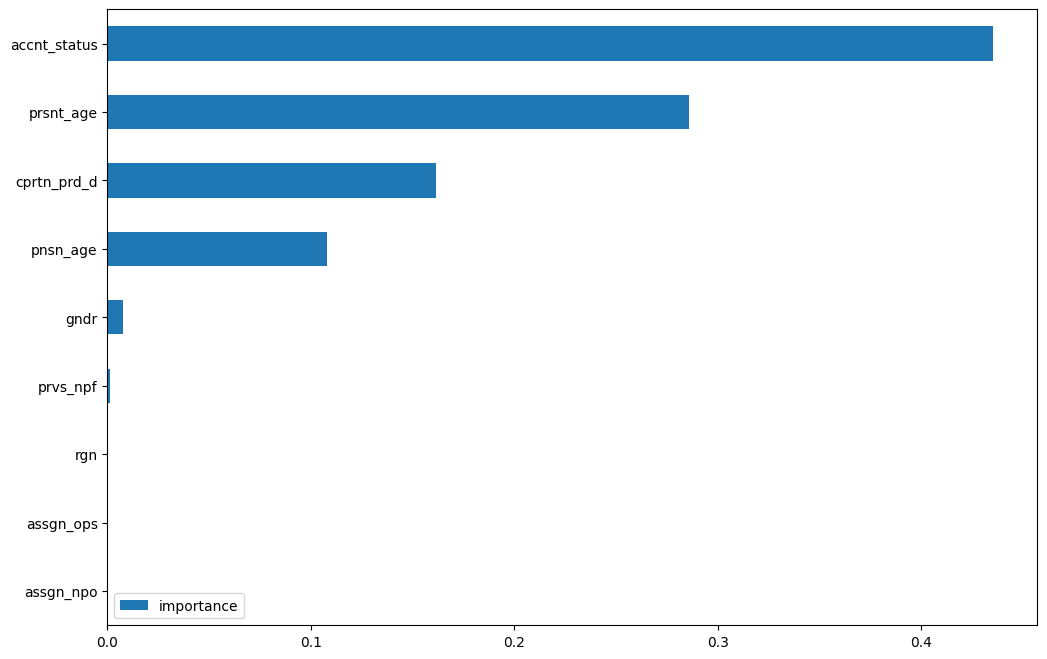

In [22]:
imp = pd.DataFrame(rf_model.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

Сохранение моделей

In [95]:
pickle.dump(rf_model, open('models/random_forest.model', 'wb'))
pickle.dump(xgboost_model, open('models/xgb.model', 'wb'))
pickle.dump(best_estimator, open('models/lgbm.model', 'wb'))

# Этап 2. Подготавливаем датасет для теста

In [2]:
df = pd.read_csv("D:/datasets/pfo/cntrbtrs_clnts_ops_trn.csv", sep=';', encoding='windows-1251')

C:\Users\nanan\AppData\Local\Temp\ipykernel_12120\4075315184.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:/datasets/pfo/cntrbtrs_clnts_ops_trn.csv", sep=';', encoding='windows-1251')


In [3]:
df = df.drop(columns=['slctn_nmbr', 'clnt_id', 'accnt_id', 'accnt_bgn_date'])
df = df.drop(columns=['brth_yr', 'brth_plc'])
df = df.drop(columns=['dstrct', 'city', 'sttlmnt', 'pstl_code', 'addrss_type'])
df = df.drop(columns=['phn', 'email', 'lk'])
df = df.drop(columns=['okato'])
df = df[df['rgn'].notna()]
df = df.fillna(0.0)
df.loc[df['prvs_npf'] != 0.0, 'prvs_npf'] = 1.0

In [4]:
df['gndr'] = df['gndr'].replace(['ж', 'м'], [0.0, 1.0])
df['accnt_status'] = df['accnt_status'].replace(['Выплатной период', 'Накопительный период'], [0.0, 1.0])
df['assgn_npo'] = df['assgn_npo'].replace(['нет', 'да'], [0.0, 1.0])
df['assgn_ops'] = df['assgn_ops'].replace(['нет', 'да'], [0.0, 1.0])

In [5]:
cprtn_scaler = pickle.load(open("scalers/cprtn_scaler.sav", "rb"))
prsnt_age_scaler = pickle.load(open("scalers/prsnt_age_scaler.sav", "rb"))
pnsn_age_scaler = pickle.load(open("scalers/pnsn_age_scaler.sav", "rb"))
rgn_encoder = pickle.load(open("scalers/rgn_encoder.sav", "rb"))
rgn_scaler = pickle.load(open("scalers/rgn_scaler.sav", "rb"))

In [6]:
df["cprtn_prd_d"] = cprtn_scaler.transform(df.iloc[:, 2:3])

In [7]:
df["prsnt_age"] = prsnt_age_scaler.transform(df.iloc[:, 1:2])
df["pnsn_age"] = pnsn_age_scaler.transform(df.iloc[:, 5:6])
df["rgn"] = rgn_encoder.transform(df['rgn'])

In [8]:
df["rgn"] = rgn_scaler.transform(df.iloc[:, 7:8])

In [9]:
X_test = df.drop("erly_pnsn_flg", axis=1)

In [10]:
X_test["prvs_npf"] = X_test["prvs_npf"].astype("float")

In [11]:
y_test = df["erly_pnsn_flg"]

Загружаем модели

In [12]:
lgbm_model = pickle.load(open("models/lgbm.model", "rb"))
rf_model = pickle.load(open("models/random_forest.model", "rb"))
xgboost_model = pickle.load(open("models/xgb.model", "rb"))

Высчитываем метрику

In [13]:
print(f"RandomForest F1: {f1_score(y_test, rf_model.predict(X_test))}, accuracy: {accuracy_score(y_test, rf_model.predict(X_test))}")

RandomForest F1: 0.985440105890139, accuracy: 0.9989250807598852


In [14]:
print(f"XGBoost F1: {f1_score(y_test, xgboost_model.predict(X_test))}, accuracy: {accuracy_score(y_test, xgboost_model.predict(X_test))}")

XGBoost F1: 0.988895979578813, accuracy: 0.9991825351932694


In [15]:
print(f"LightGBM F1: {f1_score(y_test, lgbm_model.predict(X_test))}, accuracy: {accuracy_score(y_test, lgbm_model.predict(X_test))}")

LightGBM F1: 0.9895247828308635, accuracy: 0.9992295159292883


In [27]:
y_test.tolist().count(1)

19370

In [28]:
lgbm_model.predict(X_test).tolist().count(1)

19770

модель предсказала лишних ~500 записей в большую сторону, ошибка значительна